<h1>Coursera_Capstone Project to Predict Accident Severity</h1>

<h3>Introduction/Business Problem</h3>
The objective of this project is to predict severity of Traffic collisions in terms of (human fatality, serious injury, injury, property damage, and others). The data set provided by COURSERA is collected and weekly-updated by Seatle SDOT Traffic Management Division. The study will provide insights to serve accident reduction expected under certain conditions. Audiences expected are (General population, Road Traffic engineers, Road traffic consultants)

<h3>Data section</h3>
The data set contains 194673 observations and 38 variables.
Our target is to predict the level of severity caused by an accident under (SEVERITYCODE) label. Hence, (SEVERITYCODE) will be our dependent variable Y
We will use different combinations of remaining independent variables X to identify which factors lead to the level of severity caused by an accident.

To accomplish our target, we will need to pre-process our data set. first, by removing unrelated columns and handling missing values. Then, we select attributes that have more impact on (SEVERITYCODE) such as (ADDRTYPE, WEATHER, ROADCOND, LIGHTCOND...etc)

A detailed description on attributes can be found under:
https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Metadata.pdf


<h3>Import Libraries</h3>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

<h3>Read Data Set</h3>

In [2]:
Data_Path="https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv"
df = pd.read_csv(Data_Path)

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


<h3>Drop empty values under "SEVERITYCODE" </h3>

In [4]:
df.dropna(subset=["SEVERITYCODE"], axis=0, inplace=True)


<h3>Count missing values in each column </h3>

In [5]:
missing_data = df.isnull()
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")

SEVERITYCODE
False    194673
Name: SEVERITYCODE, dtype: int64

X
False    189339
True       5334
Name: X, dtype: int64

Y
False    189339
True       5334
Name: Y, dtype: int64

OBJECTID
False    194673
Name: OBJECTID, dtype: int64

INCKEY
False    194673
Name: INCKEY, dtype: int64

COLDETKEY
False    194673
Name: COLDETKEY, dtype: int64

REPORTNO
False    194673
Name: REPORTNO, dtype: int64

STATUS
False    194673
Name: STATUS, dtype: int64

ADDRTYPE
False    192747
True       1926
Name: ADDRTYPE, dtype: int64

INTKEY
True     129603
False     65070
Name: INTKEY, dtype: int64

LOCATION
False    191996
True       2677
Name: LOCATION, dtype: int64

EXCEPTRSNCODE
True     109862
False     84811
Name: EXCEPTRSNCODE, dtype: int64

EXCEPTRSNDESC
True     189035
False      5638
Name: EXCEPTRSNDESC, dtype: int64

SEVERITYCODE.1
False    194673
Name: SEVERITYCODE.1, dtype: int64

SEVERITYDESC
False    194673
Name: SEVERITYDESC, dtype: int64

COLLISIONTYPE
False    189769
True       4904
Name: C

Based on the summary above, each column has 194673 rows of data, below columns containing missing data:
<ol>
    <li>"X": 5334 missing data</li>
    <li>"Y": 5334 missing data</li>
    <li>"ADDRTYPE": 1926 missing data</li>
    <li>"INTKEY" : 65070 missing data</li>
    <li>"LOCATION": 2677 missing data</li>
    <li>"EXCEPTRSNCODE": 109862 missing data</li>
    <li>"EXCEPTRSNDESC": 189035 missing data</li>
    <li>"COLLISIONTYPE": 4904 missing data</li>
    <li>"JUNCTIONTYPE": 6329 missing data</li>
    <li>"INATTENTIONIND": 164868 missing data</li>
    <li>"UNDERINFL": 4884 missing data</li>
    <li>"WEATHER": 5081 missing data</li>
    <li>"ROADCOND": 5012 missing data</li>
    <li>"LIGHTCOND": 5170 missing data</li>
    <li>"PEDROWNOTGRNT": 190006 missing data</li>
    <li>"SDOTCOLNUM": 79737 missing data</li>
    <li>"SPEEDING": 185340 missing data</li>
    <li>"ST_COLCODE": 18 missing data</li>
    <li>"ST_COLDESC": 4904 missing data</li>

</ol>

<h3>Drop unrelated columns, and columns that are mostly missing data </h3>
we will drop columns below:
<ol>
    <li>"X"</li>
    <li>"Y"</li>
    <li>"OBJECTID"</li>
    <li>"INCKEY"</li>
    <li>"COLDETKEY"</li>
    <li>"REPORTNO"</li>
    <li>"STATUS"</li>
        <li>"LOCATION"</li>
    <li>INCDATE</li>
    <li>"EXCEPTRSNCODE"</li>
    <li>"EXCEPTRSNDESC"</li>
    <li>"SEVERITYCODE.1"</li>
    <li>INATTENTIONIND</li>
    <li>"PEDROWNOTGRNT"</li>
    <li>"SPEEDING"</li>
        <li>"SDOTCOLNUM"</li>


      
</ol>

In [6]:
df.drop(['X','Y','OBJECTID','REPORTNO','STATUS','LOCATION','INCKEY','COLDETKEY','PEDROWNOTGRNT','EXCEPTRSNCODE','EXCEPTRSNDESC','INATTENTIONIND','INCDATE','SPEEDING','SEVERITYCODE.1','SDOTCOLNUM'],
  axis='columns', inplace=True)

<h3>Handle Missing Data</h3>
<ol>
    <li>"ADDRTYPE": replace by most frequent</li>
    <li>INTKEY:replace by 0 for "no intersection"</li>
    <li>"COLLISIONTYPE": remove rows</li>
    <li>"JUNCTIONTYPE": replace by most frequent</li>
    <li>"UNDERINFL": convert "N" to "0" and "Y" to "1", and replace by most frequent</li>
    <li>"WEATHER": replace by "unknown"</li>
    <li>"ROADCOND":  replace by "unknown"</li>
    <li>"LIGHTCOND":  replace by "unknown"</li>
    <li>"ST_COLCODE": replace by most frequent </li>
    <li>"ST_COLDESC": will leave as is ,it describes ST_COLCODE </li>


</ol>

In [7]:
df.dropna(subset=["COLLISIONTYPE"], axis=0, inplace=True)

In [8]:
df['ADDRTYPE'].value_counts().idxmax()
df["ADDRTYPE"].replace(np.nan, "Block", inplace=True)

In [9]:
df['ST_COLCODE'].value_counts().idxmax()
df["ST_COLCODE"].replace(np.nan, "32", inplace=True)

In [10]:
df["INTKEY"].replace(np.nan, "0", inplace=True)

In [11]:
df['JUNCTIONTYPE'].value_counts().idxmax()
df["JUNCTIONTYPE"].replace(np.nan, "Mid-Block (not related to intersection)", inplace=True)

In [12]:
df["UNDERINFL"].replace("N", "0", inplace=True)
df["UNDERINFL"].replace("Y", "1", inplace=True)
df['UNDERINFL'].value_counts().idxmax()
df["UNDERINFL"].replace(np.nan, "0", inplace=True)

In [13]:
df["WEATHER"].replace(np.nan, "Unknown", inplace=True)
df["ROADCOND"].replace(np.nan, "Unknown", inplace=True)
df["LIGHTCOND"].replace(np.nan, "Unknown", inplace=True)


<h3>Check Data Types</h3>


In [79]:
df.dtypes

SEVERITYCODE      int64
ADDRTYPE          int64
INTKEY            int64
SEVERITYDESC     object
COLLISIONTYPE     int64
PERSONCOUNT       int64
PEDCOUNT          int64
PEDCYLCOUNT       int64
VEHCOUNT          int64
JUNCTIONTYPE      int64
SDOT_COLCODE      int64
SDOT_COLDESC     object
UNDERINFL         int64
WEATHER           int64
ROADCOND          int64
LIGHTCOND         int64
ST_COLCODE        int64
ST_COLDESC       object
SEGLANEKEY        int64
CROSSWALKKEY      int64
HITPARKEDCAR      int64
dtype: object

<h4>We will convert "UNDERINFL","INTKEY","ST_COLCODE" to int64</h4>

In [15]:
df[["UNDERINFL"]] = df[["UNDERINFL"]].astype("int")
df[["INTKEY"]] = df[["INTKEY"]].astype("int")
df[["ST_COLCODE"]] = df[["ST_COLCODE"]].astype("int")


<h4>We will convert INCDTTM variable into Date variable</h4>

In [16]:
df['INCDTTM'] = df['INCDTTM'].astype('datetime64[ns]')

<h2> Data Exploratory</h2>

<h3>What are the main characteristics which have the most impact on Accident Severity?</h3>

<h2 id="pattern_visualization">1. Analyzing Individual Feature Patterns using Visualization</h2>
We will analyze each feature against SEVERITYCODE using boxplot, and will convert categorical variables into numerical ones for further analysis

In [17]:
%%capture
! pip install seaborn

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

<h3>ADDRTYPE vs SEVERITYCODE </h3>

In [19]:
df['ADDRTYPE'].value_counts()

Block           125477
Intersection     63545
Alley              747
Name: ADDRTYPE, dtype: int64

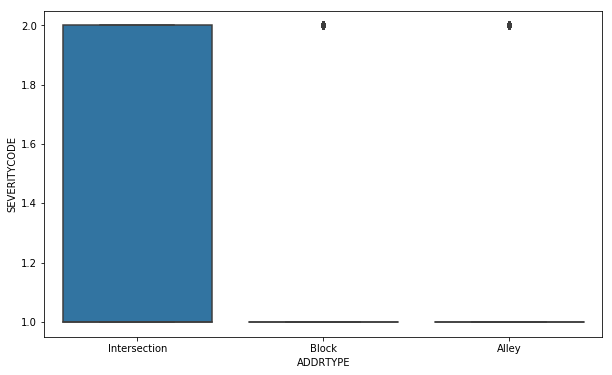

In [20]:
plt.figure(figsize=(10,6))
sns.boxplot(x="ADDRTYPE", y="SEVERITYCODE", data=df)
plt.show()

we will convert ADDRTYPE to numerical value and generate regression plot

In [21]:
df['ADDRTYPE'].replace(to_replace=['Block','Intersection','Alley'], value=[0,1,2],inplace=True)

(0, 2.0521721566863267)

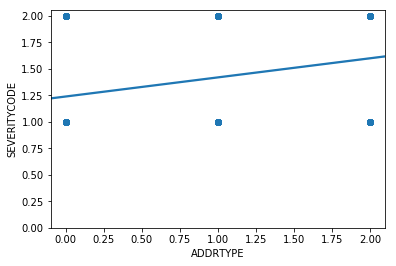

In [22]:
sns.regplot(x="ADDRTYPE", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents happen at ADDRTYPE "Block". and from both box plots and regression plots, we can see Severity is impacted. 

<h3>COLLISIONTYPE vs SEVERITYCODE </h3>


In [23]:
df['COLLISIONTYPE'].value_counts()

Parked Car    47987
Angles        34674
Rear Ended    34090
Other         23703
Sideswipe     18609
Left Turn     13703
Pedestrian     6608
Cycles         5415
Right Turn     2956
Head On        2024
Name: COLLISIONTYPE, dtype: int64

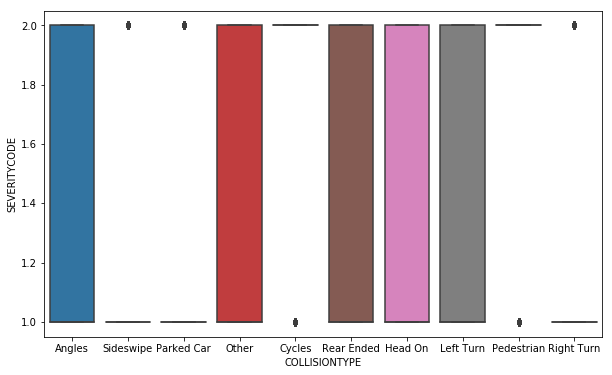

In [24]:
plt.figure(figsize=(10,6))
sns.boxplot(x="COLLISIONTYPE", y="SEVERITYCODE", data=df)
plt.show()

we will convert COLLISIONTYPE to numerical value and generate regression plot

In [25]:
df['COLLISIONTYPE'].replace(to_replace=['Parked Car','Angles','Rear Ended','Other','Sideswipe','Left Turn','Pedestrian','Cycles','Right Turn','Head On'], value=[0,1,2,3,4,5,6,7,8,9],inplace=True)

(0, 2.0521721566863267)

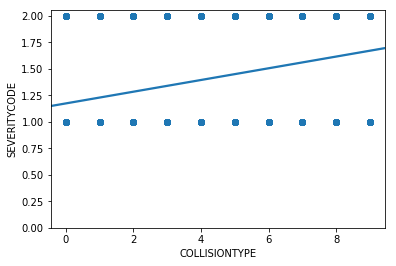

In [26]:
sns.regplot(x="COLLISIONTYPE", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents happen at COLLISIONTYPE "Parked Car". and Severity is affected by the COLLISIONTYPE . 

<h3>PERSONCOUNT vs SEVERITYCODE </h3>


In [27]:
df['PERSONCOUNT'].value_counts()

2     111387
3      35138
4      14445
1      11727
5       6584
0       5541
6       2702
7       1131
8        533
9        216
10       128
11        56
12        33
13        21
14        19
15        11
17        11
16         8
44         6
18         6
20         6
25         6
19         5
26         4
22         4
27         3
28         3
29         3
47         3
32         3
34         3
37         3
23         2
21         2
24         2
30         2
36         2
57         1
31         1
35         1
39         1
41         1
43         1
48         1
53         1
54         1
81         1
Name: PERSONCOUNT, dtype: int64

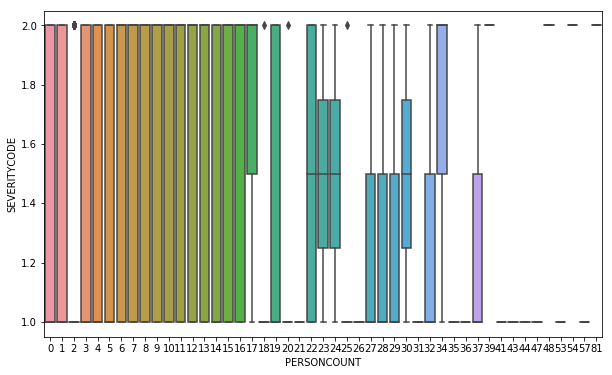

In [28]:
plt.figure(figsize=(10,6))
sns.boxplot(x="PERSONCOUNT", y="SEVERITYCODE", data=df)
plt.show()

(0, 5.385522327476911)

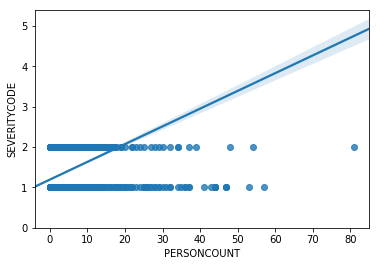

In [29]:
sns.regplot(x="PERSONCOUNT", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents involve two persons. and Severity is slightly affected by the PERSONCOUNT.

<h3>PEDCOUNT vs SEVERITYCODE </h3>


In [30]:
df['PEDCOUNT'].value_counts()

0    182830
1      6685
2       226
3        22
4         4
6         1
5         1
Name: PEDCOUNT, dtype: int64

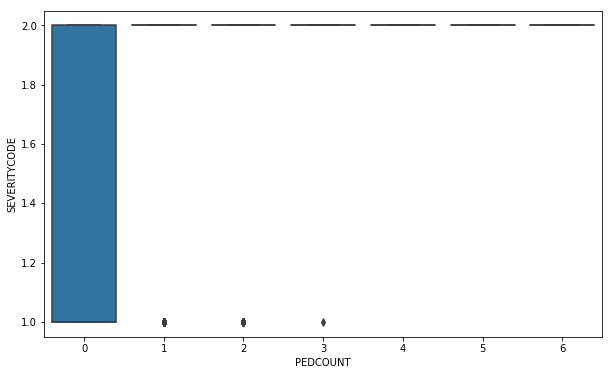

In [31]:
plt.figure(figsize=(10,6))
sns.boxplot(x="PEDCOUNT", y="SEVERITYCODE", data=df)
plt.show()

(0, 5.117650729151911)

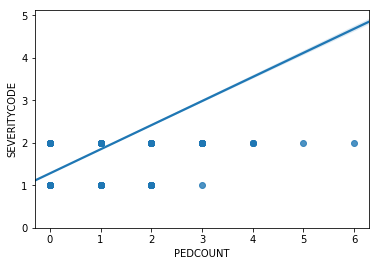

In [32]:
sns.regplot(x="PEDCOUNT", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents involve no pedestrians. and Severity is affected by the PEDCOUNT.

<h3>PEDCYLCOUNT vs SEVERITYCODE </h3>


In [33]:
df['PEDCYLCOUNT'].value_counts()

0    184301
1      5425
2        43
Name: PEDCYLCOUNT, dtype: int64

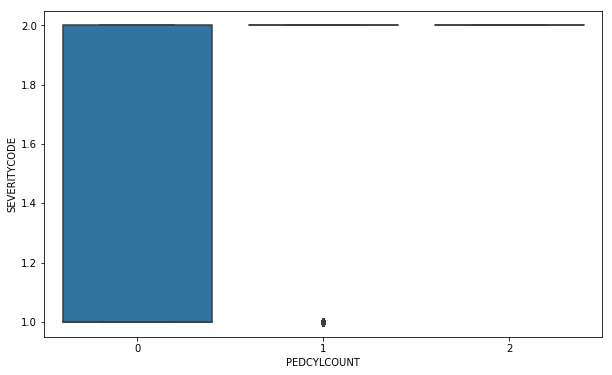

In [34]:
plt.figure(figsize=(10,6))
sns.boxplot(x="PEDCYLCOUNT", y="SEVERITYCODE", data=df)
plt.show()

(0, 2.606779059274609)

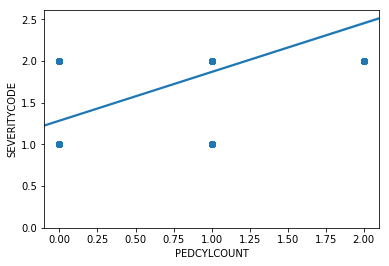

In [35]:
sns.regplot(x="PEDCYLCOUNT", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents involve no cyclists. and Severity is affected by the PEDCYLCOUNT.

<h3>VEHCOUNT vs SEVERITYCODE </h3>


In [36]:
df['VEHCOUNT'].value_counts()

2     147645
1      25733
3      13010
4       2426
5        529
0        201
6        146
7         46
8         15
9          9
11         6
10         2
12         1
Name: VEHCOUNT, dtype: int64

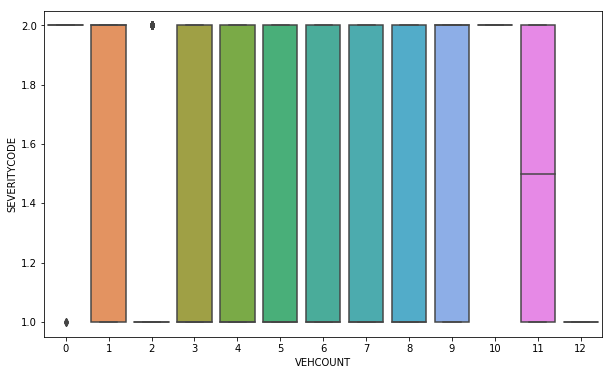

In [37]:
plt.figure(figsize=(10,6))
sns.boxplot(x="VEHCOUNT", y="SEVERITYCODE", data=df)
plt.show()

(0, 2.0747745751013325)

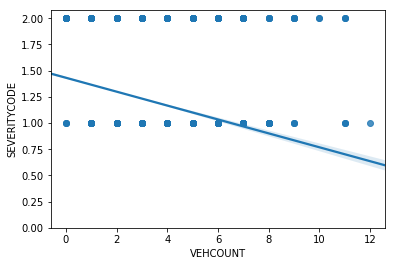

In [38]:
sns.regplot(x="VEHCOUNT", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents involve two vehicles. and Severity is -ve affected by the VEHCOUNT.

<h3>INCDTTM (Date and Time) vs SEVERITYCODE </h3>

In [39]:
df['INCDTTM'].dt.date.value_counts()

2006-11-02    96
2008-10-03    92
2005-05-18    84
2006-01-13    83
2005-11-05    83
2008-10-31    82
2005-04-29    76
2005-04-15    75
2007-10-19    74
2004-12-04    74
2005-10-28    73
2006-06-01    73
2007-07-20    73
2006-10-18    70
2006-11-04    70
2007-11-15    70
2010-11-22    70
2005-11-04    69
2016-10-13    69
2006-11-22    69
2005-12-10    68
2006-11-06    68
2006-11-10    68
2006-11-21    68
2006-04-08    68
2006-05-05    68
2007-01-05    68
2005-11-11    68
2010-10-09    68
2005-11-01    67
              ..
2020-04-06     4
2020-04-14     4
2020-04-23     4
2020-04-11     4
2020-03-28     3
2020-04-12     3
2020-04-05     3
2020-04-19     3
2020-01-27     3
2004-12-25     3
2020-04-21     2
2020-04-25     2
2020-04-27     2
2020-02-18     2
2020-01-28     2
2020-01-30     2
2013-05-01     2
2020-02-03     2
2020-02-21     2
2020-02-24     2
2020-04-28     1
2020-04-26     1
2020-02-16     1
2020-02-10     1
2020-02-11     1
2020-04-29     1
2020-02-20     1
2020-02-13    

In [40]:
df['INCDTTM'].dt.time.value_counts()

00:00:00    25643
12:00:00     1350
13:00:00     1188
17:00:00     1178
18:00:00     1123
15:00:00     1065
16:00:00     1046
14:00:00      982
10:00:00      926
09:00:00      896
08:00:00      857
19:00:00      851
17:30:00      842
20:00:00      804
11:00:00      773
16:30:00      759
00:01:00      722
15:30:00      704
22:00:00      684
18:30:00      676
14:30:00      648
13:30:00      631
23:00:00      607
21:00:00      579
10:30:00      572
12:30:00      571
08:30:00      566
11:30:00      553
09:30:00      529
02:00:00      523
            ...  
04:06:00       13
04:43:00       13
03:39:00       13
04:37:00       13
03:42:00       13
04:27:00       13
05:11:00       12
04:21:00       12
03:56:00       12
05:33:00       12
04:04:00       12
04:03:00       11
04:31:00       11
03:51:00       11
04:29:00       11
04:32:00       11
05:06:00       10
04:13:00       10
04:42:00       10
05:13:00       10
04:39:00       10
04:52:00       10
05:08:00        9
03:31:00        9
03:46:00  

We will need to add columns for year, month, day and analyze individually

In [41]:
df["time"]=df["INCDTTM"].dt.time

In [42]:
df["time"].value_counts().idxmax()

datetime.time(0, 0)

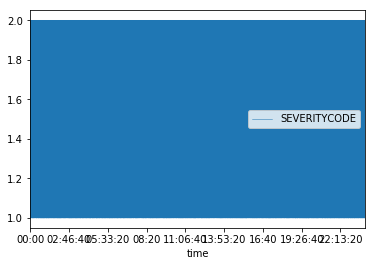

In [43]:
df.plot(x='time', y='SEVERITYCODE',linewidth=0.5)


In [44]:
df["month"]=df["INCDTTM"].dt.month

In [45]:
df["month"].value_counts().idxmax()

10

(0, 2.0521721566863267)

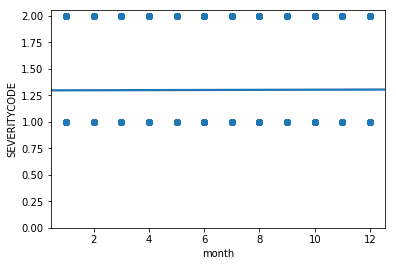

In [46]:
sns.regplot(x="month", y="SEVERITYCODE", data=df)
plt.ylim(0,)

In [47]:
df["day"]=df["INCDTTM"].dt.day

In [48]:
df["day"].value_counts().idxmax()

15

(0, 2.0521721566863267)

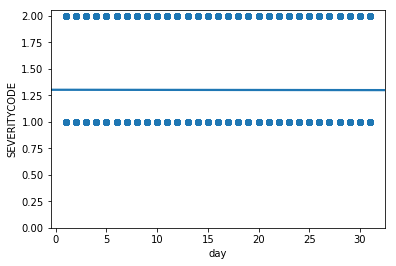

In [49]:
sns.regplot(x="day", y="SEVERITYCODE", data=df)
plt.ylim(0,)

In [50]:
df["year"]=df["INCDTTM"].dt.year

In [51]:
df["year"].value_counts().idxmax()

2006

(0, 2.0521721566863267)

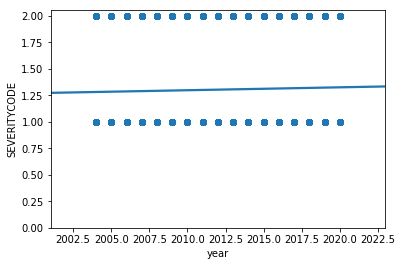

In [52]:
sns.regplot(x="year", y="SEVERITYCODE", data=df)
plt.ylim(0,)

we can see that most accidents happen at the month of october. also on the day of mid month. yet we can see no clear impact on accident severity. so we will drop all columns

In [53]:
df.drop(['INCDTTM','day','month','time','year'],  axis='columns', inplace=True)

In [78]:
df.head()

,SEVERITYCODE,ADDRTYPE,INTKEY,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,...,SDOT_COLDESC,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,1,37475,Injury Collision,1,2,0,0,2,1,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,2,1,0,10,Entering at angle,0,0,0
1,1,0,0,Property Damage Only Collision,4,2,0,0,2,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE ...",0,1,1,1,11,From same direction - both going straight - bo...,0,0,0
2,1,0,0,Property Damage Only Collision,0,4,0,0,3,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END",0,2,0,0,32,One parked--one moving,0,0,0
3,1,0,0,Property Damage Only Collision,3,3,0,0,3,0,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,0,0,0,23,From same direction - all others,0,0,0
4,2,1,34387,Injury Collision,1,2,0,0,2,1,...,"MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END ...",0,1,1,0,10,Entering at angle,0,0,0


<h3>JUNCTIONTYPE vs SEVERITYCODE </h3>

In [55]:
df['JUNCTIONTYPE'].value_counts()

Mid-Block (not related to intersection)              93293
At Intersection (intersection related)               61321
Mid-Block (but intersection related)                 22388
Driveway Junction                                    10538
At Intersection (but not related to intersection)     2060
Ramp Junction                                          162
Unknown                                                  7
Name: JUNCTIONTYPE, dtype: int64

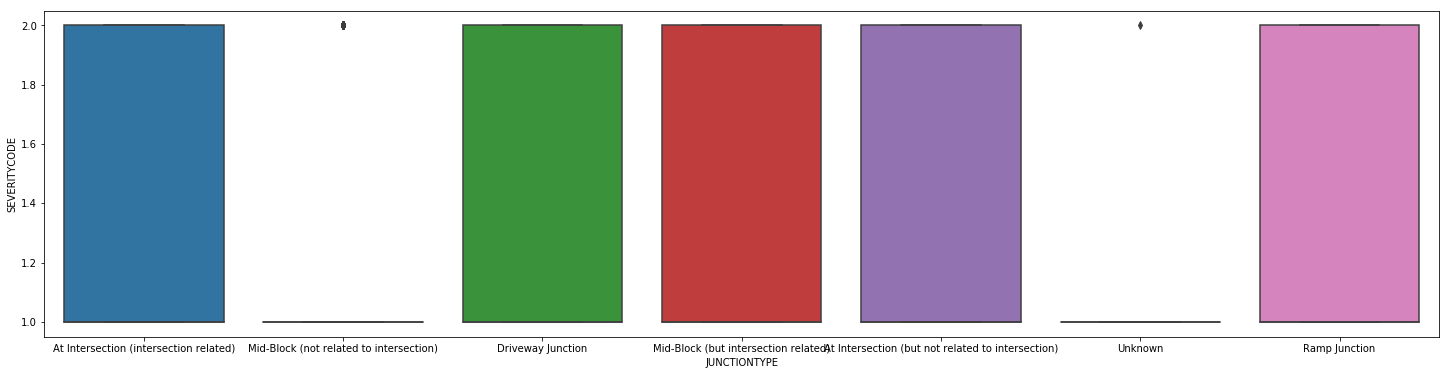

In [56]:
plt.figure(figsize=(25,6))
sns.boxplot(x="JUNCTIONTYPE", y="SEVERITYCODE", data=df)
plt.show()

we will convert JUNCTIONTYPE to numerical value and generate regression plot

In [57]:
df['JUNCTIONTYPE'].replace(to_replace=['Mid-Block (not related to intersection)','At Intersection (intersection related)','Mid-Block (but intersection related)','Driveway Junction','At Intersection (but not related to intersection)','Ramp Junction','Unknown'], value=[0,1,2,3,4,5,6],inplace=True)

(0, 2.0521721566863267)

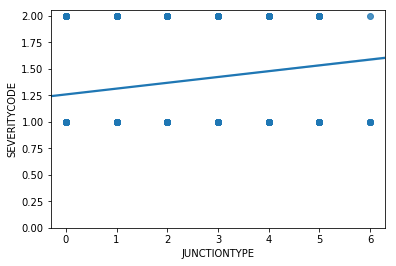

In [58]:
sns.regplot(x="JUNCTIONTYPE", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents happen at mid-block. and Severity is  affected by the JUNCTIONTYPE.

<h3>SDOT_COLCODE and SDOT_COLDESC vs SEVERITYCODE </h3>


In [59]:
df['SDOT_COLCODE'].value_counts()

11    83298
14    52756
16     9801
0      8975
28     8774
24     6391
13     5798
26     4656
18     3027
15     1575
12     1429
51     1289
29      473
21      181
56      178
27      162
54      134
23      123
48      106
31      103
25      101
34       92
64       75
69       68
33       53
55       50
66       23
22       17
32       12
53        9
44        8
61        7
35        6
58        5
68        4
36        4
46        3
52        2
47        1
Name: SDOT_COLCODE, dtype: int64

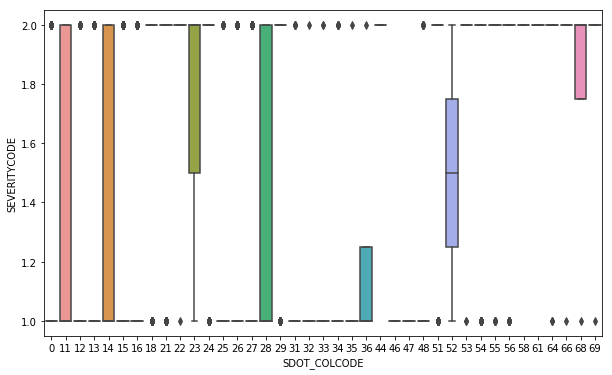

In [60]:
plt.figure(figsize=(10,6))
sns.boxplot(x="SDOT_COLCODE", y="SEVERITYCODE", data=df)
plt.show()

(0, 2.098671434881186)

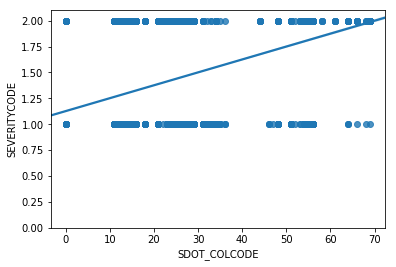

In [61]:
sns.regplot(x="SDOT_COLCODE", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that most accidents are of type 11 (MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE). and Severity  affected by the SDOT_COLCODE and SDOT_COLDESC .

<h3>UNDERINFL vs SEVERITYCODE </h3>


In [62]:
df['UNDERINFL'].value_counts()

0    180649
1      9120
Name: UNDERINFL, dtype: int64

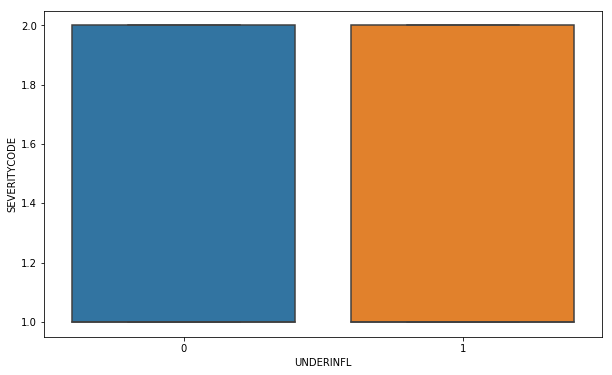

In [63]:
plt.figure(figsize=(10,6))
sns.boxplot(x="UNDERINFL", y="SEVERITYCODE", data=df)
plt.show()

(0, 2.0521721566863267)

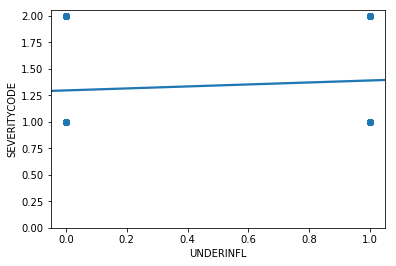

In [64]:
sns.regplot(x="UNDERINFL", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that using this set of data that most accident happen at "0" UNDERINFL. and from both box plot and regression plot, UNDERINFL slightly affect the Severity of an accident

<h3>WEATHER vs SEVERITYCODE </h3>

In [65]:
df['WEATHER'].value_counts()

Clear                       111129
Raining                      33138
Overcast                     27708
Unknown                      15287
Snowing                        907
Other                          832
Fog/Smog/Smoke                 569
Sleet/Hail/Freezing Rain       113
Blowing Sand/Dirt               56
Severe Crosswind                25
Partly Cloudy                    5
Name: WEATHER, dtype: int64

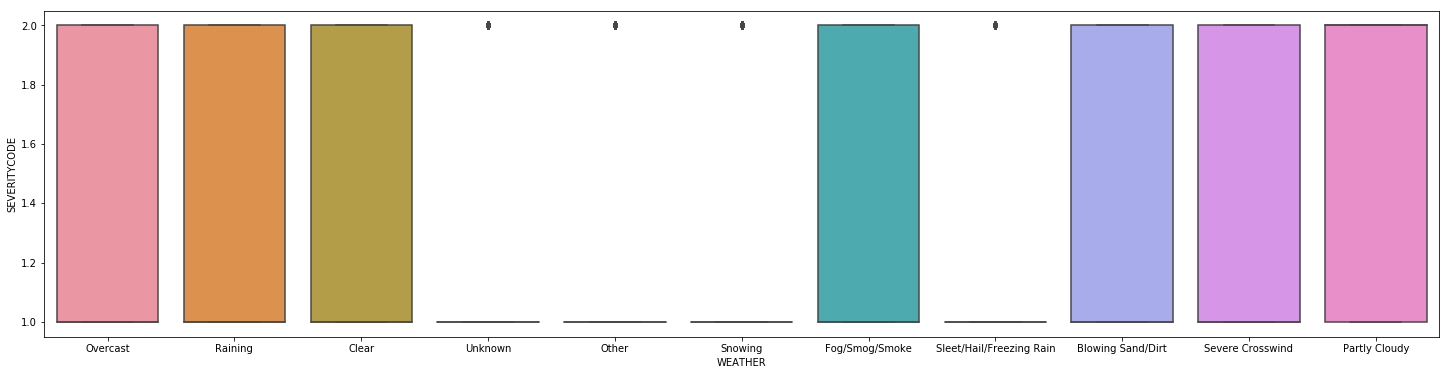

In [66]:
plt.figure(figsize=(25,6))
sns.boxplot(x="WEATHER", y="SEVERITYCODE", data=df)
plt.show()

we will convert WEATHER to numerical value and generate regression plot

In [67]:
df['WEATHER'].replace(to_replace=['Clear','Raining','Overcast','Unknown','Snowing','Other','Fog/Smog/Smoke','Sleet/Hail/Freezing Rain','Blowing Sand/Dirt','Severe Crosswind','Partly Cloudy'], value=[0,1,2,3,4,5,6,7,8,9,10],inplace=True)

(0, 2.059085388732375)

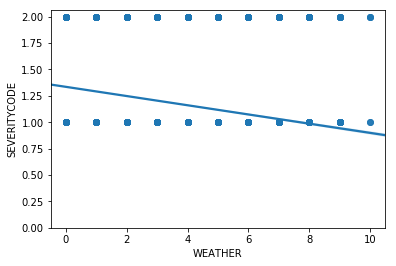

In [68]:
sns.regplot(x="WEATHER", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that using this set of data that most accident happen at "Clear WEATHER. and WEATHER does affect the Severity of an accident

<h3>ROADCOND vs SEVERITYCODE </h3>

In [68]:
df['ROADCOND'].value_counts()

Dry               124504
Wet                47464
Unknown            15203
Ice                 1208
Snow/Slush          1004
Other                132
Standing Water       115
Sand/Mud/Dirt         75
Oil                   64
Name: ROADCOND, dtype: int64

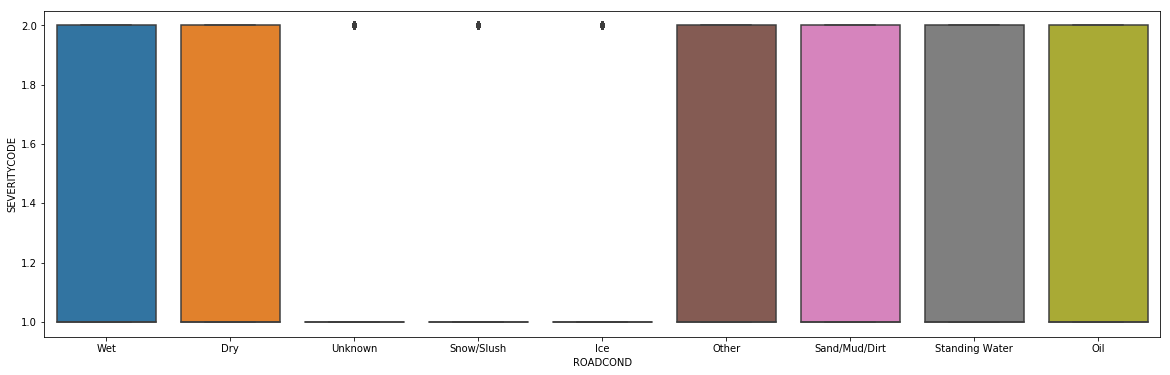

In [69]:
plt.figure(figsize=(20,6))
sns.boxplot(x="ROADCOND", y="SEVERITYCODE", data=df)
plt.show()

we will convert ROADCOND to numerical value and generate regression plot

In [70]:
df['ROADCOND'].replace(to_replace=['Dry','Wet','Unknown','Ice','Snow/Slush','Other','Standing Water','Sand/Mud/Dirt','Oil'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

(0, 2.0630423637477056)

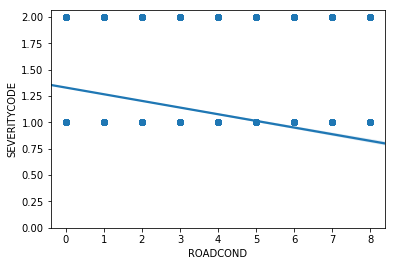

In [72]:
sns.regplot(x="ROADCOND", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that using this set of data that most accident happen at "dry" ROADCOND. and ROADCOND does affect the Severity of an accident

<h3>LIGHTCOND vs SEVERITYCODE </h3>

In [71]:
df['LIGHTCOND'].value_counts()

Daylight                    116124
Dark - Street Lights On      48504
Unknown                      13758
Dusk                          5901
Dawn                          2501
Dark - No Street Lights       1536
Dark - Street Lights Off      1199
Other                          235
Dark - Unknown Lighting         11
Name: LIGHTCOND, dtype: int64

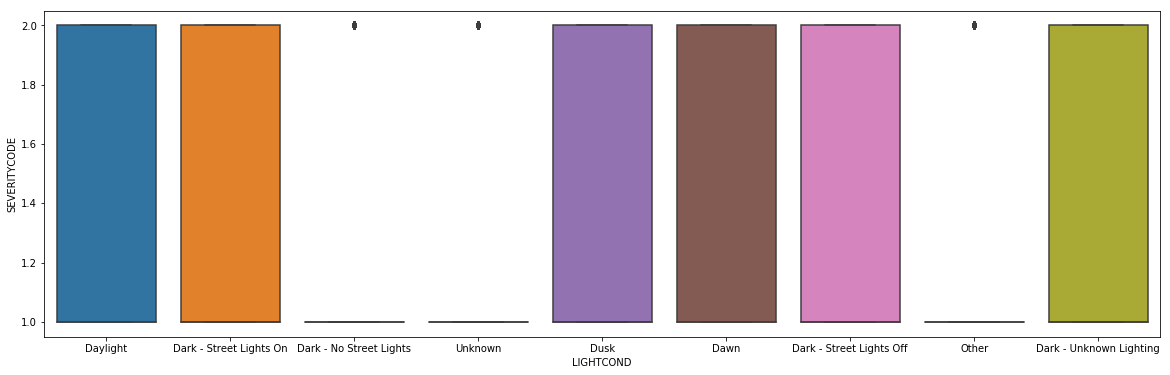

In [72]:
plt.figure(figsize=(20,6))
sns.boxplot(x="LIGHTCOND", y="SEVERITYCODE", data=df)
plt.show()

we will convert LIGHTCOND to numerical value and generate regression plot

In [73]:
df['LIGHTCOND'].replace(to_replace=['Daylight','Dark - Street Lights On','Unknown','Dusk','Dawn','Dark - No Street Lights','Dark - Street Lights Off','Other','Dark - Unknown Lighting'], value=[0,1,2,3,4,5,6,7,8],inplace=True)

(0, 2.0521721566863267)

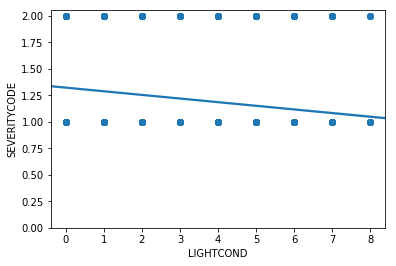

In [76]:
sns.regplot(x="LIGHTCOND", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that using this set of data that most accident happen at "Daylight" LIGHTCOND. and LIGHTCOND does affect the Severity of an accident

<h3>HITPARKEDCAR vs SEVERITYCODE </h3>

In [74]:
df['HITPARKEDCAR'].value_counts()

N    182853
Y      6916
Name: HITPARKEDCAR, dtype: int64

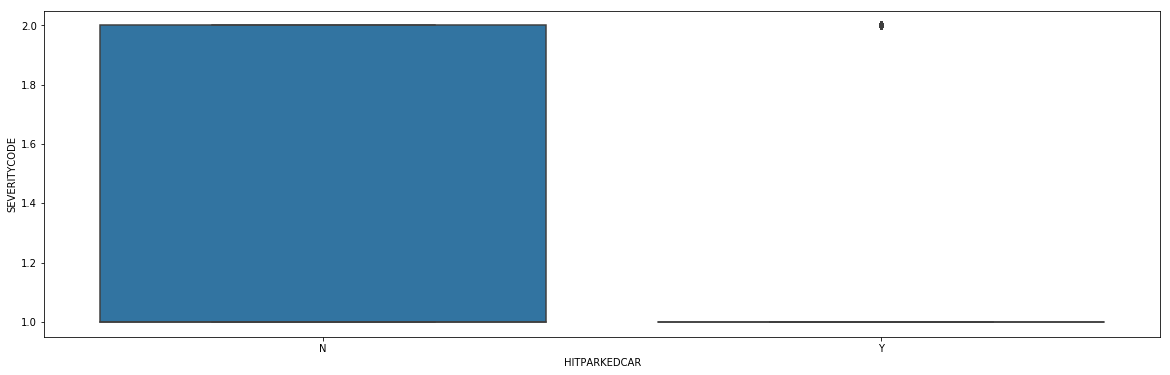

In [75]:
plt.figure(figsize=(20,6))
sns.boxplot(x="HITPARKEDCAR", y="SEVERITYCODE", data=df)
plt.show()

we will convert HITPARKEDCAR to numerical value and generate regression plot

In [76]:
df['HITPARKEDCAR'].replace(to_replace=['N','Y'], value=[0,1],inplace=True)

(0, 2.0521721566863267)

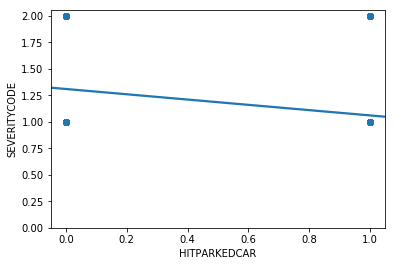

In [80]:
sns.regplot(x="HITPARKEDCAR", y="SEVERITYCODE", data=df)
plt.ylim(0,)

We can see that using this set of data that most accident happen are "No" HITPARKEDCAR. and HITPARKEDCAR does affect the Severity of an accident

<h2 id="pattern_visualization">2. correlation</h2>


In [77]:
df.corr()

,SEVERITYCODE,ADDRTYPE,INTKEY,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
SEVERITYCODE,1.000000,0.189774,0.106155,0.259185,0.129823,0.248156,0.215492,-0.080673,0.113023,0.186063,0.043801,-0.105759,-0.104697,-0.079385,-0.164757,0.104359,0.175593,-0.101979
ADDRTYPE,0.189774,1.000000,0.494258,0.216158,0.058318,0.144176,0.082158,-0.096441,0.227868,-0.045681,-0.041160,-0.089308,-0.094958,-0.070424,-0.191291,0.036706,0.172778,-0.128551
INTKEY,0.106155,0.494258,1.000000,0.121348,0.035402,0.071816,0.044581,-0.050585,0.127537,-0.007261,-0.022354,-0.049593,-0.051158,-0.039676,-0.095846,0.012317,0.107313,-0.064291
COLLISIONTYPE,0.259185,0.216158,0.121348,1.000000,0.010006,0.314550,0.371388,-0.328955,0.155103,0.321078,-0.005434,-0.130306,-0.123722,-0.103876,-0.022742,0.174615,0.243224,-0.195180
PERSONCOUNT,0.129823,0.058318,0.035402,0.010006,1.000000,-0.025661,-0.040866,0.400764,0.064647,-0.134862,0.020161,-0.065520,-0.065427,-0.054025,-0.215676,-0.021943,-0.033570,-0.052351
PEDCOUNT,0.248156,0.144176,0.071816,0.314550,-0.025661,1.000000,-0.017686,-0.316433,0.021407,0.262765,0.015541,-0.019420,-0.017301,-0.000188,-0.266029,0.001663,0.569105,-0.035394
PEDCYLCOUNT,0.215492,0.082158,0.044581,0.371388,-0.040866,-0.017686,1.000000,-0.305693,0.039795,0.386626,-0.017299,-0.045686,-0.052556,-0.027653,0.197853,0.456589,0.110546,-0.030210
VEHCOUNT,-0.080673,-0.096441,-0.050585,-0.328955,0.400764,-0.316433,-0.305693,1.000000,-0.020068,-0.455689,-0.012369,-0.008670,-0.021761,-0.029204,-0.241233,-0.144785,-0.237069,0.068750
JUNCTIONTYPE,0.113023,0.227868,0.127537,0.155103,0.064647,0.021407,0.039795,-0.020068,1.000000,0.017562,-0.031658,-0.082191,-0.095429,-0.094184,-0.151924,0.012379,0.031717,-0.123844
SDOT_COLCODE,0.186063,-0.045681,-0.007261,0.321078,-0.134862,0.262765,0.386626,-0.455689,0.017562,1.000000,0.106488,-0.105095,-0.084869,-0.018408,0.277830,0.206649,0.189778,-0.096926


<h2 id="pattern_visualization">3. Features X and Target Label y</h2>


In [80]:
X=df[['ADDRTYPE','COLLISIONTYPE','PERSONCOUNT','PEDCOUNT','PEDCYLCOUNT','VEHCOUNT','JUNCTIONTYPE','SDOT_COLCODE','UNDERINFL','WEATHER','ROADCOND','LIGHTCOND','HITPARKEDCAR']]

In [81]:
X[0:5]

,ADDRTYPE,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,JUNCTIONTYPE,SDOT_COLCODE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR
0,1,1,2,0,0,2,1,11,0,2,1,0,0
1,0,4,2,0,0,2,0,16,0,1,1,1,0
2,0,0,4,0,0,3,0,14,0,2,0,0,0
3,0,3,3,0,0,3,0,11,0,0,0,0,0
4,1,1,2,0,0,2,1,11,0,1,1,0,0


In [82]:
y = df['SEVERITYCODE'].values

In [83]:
y[0:5]

array([2, 1, 1, 1, 2])

<h3>Train/Test Split</h3>

In [84]:
from sklearn.model_selection import train_test_split


In [85]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (151815, 13) (151815,)
Test set: (37954, 13) (37954,)


<div id="classification">
    <h2>Classification</h2>
</div>

our model will try to predict class of accident severity y based on X features

<h3>K nearest neighbor (KNN)</h3>

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [87]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.69096801, 0.73573273, 0.7212942 , 0.73905254, 0.7298572 ,
       0.74081783, 0.7332297 , 0.74413764, 0.73860463])

In [88]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.7441376403014175 with k= 8


<h3>Decision Tree</h3>

In [89]:
from sklearn.tree import DecisionTreeClassifier
LTree = DecisionTreeClassifier(criterion="entropy", max_depth = 4)
LTree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [90]:
predTree = LTree.predict(X_test)
print (predTree [0:5])
print (y_test [0:5])

[1 1 1 1 2]
[1 1 1 1 2]


In [91]:
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_test, predTree))


DecisionTrees's Accuracy:  0.7494071771091321


<h3>Support Vector Machine</h3>

In [92]:
import scipy.optimize as opt
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [93]:
yhat3 = clf.predict(X_test)
yhat3 [0:5]

array([1, 1, 1, 1, 2])

<h3>Logistic Regression</h3>

In [94]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

In [95]:
yhat4 = LR.predict(X_test)
yhat_prob = LR.predict_proba(X_test)

<h3>Models Evaluation</h3>

In [97]:
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [99]:
neigh1 = KNeighborsClassifier(n_neighbors = 8).fit(X_train,y_train)
yhatKNN=neigh1.predict(X_test)
print("KNN jaccard_similarity_score=",jaccard_similarity_score(y_test, yhatKNN))
print("KNN f1_score=",f1_score(y_test, yhatKNN,average='weighted'))


KNN jaccard_similarity_score= 0.7441376403014175
KNN f1_score= 0.7154933606056226


In [100]:
print("decision Tree jaccard_similarity_score=",jaccard_similarity_score(y_test, predTree))
print("decision Tree f1_score=",f1_score(y_test, predTree,average='weighted'))

decision Tree jaccard_similarity_score= 0.7494071771091321
decision Tree f1_score= 0.6861485414301391


In [101]:
print("SVM jaccard_similarity_score=",jaccard_similarity_score(y_test, yhat3))
print("SVM f1_score=",f1_score(y_test, yhat3,average='weighted'))

SVM jaccard_similarity_score= 0.7609211150339885
SVM f1_score= 0.7200844169178412


In [103]:
print("Logistic Regression jaccard_similarity_score=",jaccard_similarity_score(y_test, yhat4))
print("Logistic Regression f1_score=",f1_score(y_test, yhat4,average='weighted'))
print("Logistic Regression log_loss=",log_loss(y_test, yhat_prob))

Logistic Regression jaccard_similarity_score= 0.7503293460504822
Logistic Regression f1_score= 0.7016803814168345
Logistic Regression log_loss= 0.5201591656936043
